# SimpleConv1d

## 【事前準備】

In [109]:
# scikit-learnの「set_config(display="diagram")」を使用するため、scikitlearnを最新verに更新
# !pip install scikit-learn==0.23.2 --target drive/My\ Drive/MyModule
# !pip install scikit-learn==0.23.2
# !pip list
## Google Drive上にインストールしたモジュールのインポート##
import sys
sys.path.append('/content/drive/My Drive/MyModule')

In [110]:
## モジュールのインポート ##
# 一般
import random
import math
# データ分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
# 決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
# Keras
from keras.datasets import mnist
# その他
from google.colab import drive #GoogleDriveモジュール
# drive.mount('/content/drive') #GoogleDriveのマウント

## 【実装】

### ●MNISTのデータセット

In [111]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

# 各画像のピクセルデータを平滑化（28x28 ⇒ 784x1）
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

(60000, 28, 28)
(10000, 28, 28)
uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


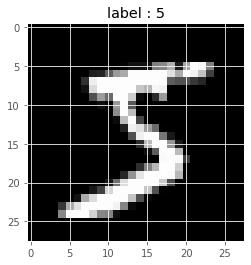

In [112]:
## 画像を可視化 ##
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

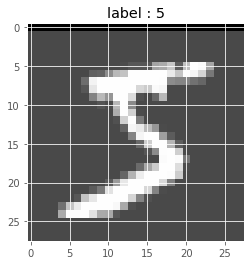

[[-105.35 -105.35 -105.35 ... -105.35 -105.35 -105.35]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]]


In [113]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
# image -= 105.35 # 意図的に負の小数値を作り出してみる
image[0] = -105.35 # 意図的に負の小数値を作り出してみる

# 自動スケーリングあり
plt.imshow(image, 'gray')   # 最小値が0となるように自動的にスケーリングされる
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image[:10]) # 値を確認

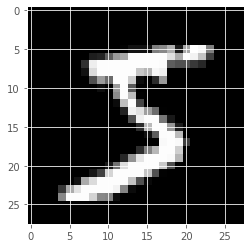

In [114]:
# 自動スケーリング無し
plt.imshow(image, 'gray', vmin = 0, vmax = 255);   # 範囲外の値は0 or 255に置換される (自動スケールされない)

In [115]:
## 画像データを正規化 ##
# X_train1 = X_train.astype(np.float) / 255
# X_test1 = X_test.astype(np.float) / 255
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
print(X_train_transformed.max()) # 1.0
print(X_test_transformed.min()) # 0.0

1.0
0.0


In [116]:
## One Hot Encoding ##
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(y_train)
print(y_train_one_hot)

(60000,)
(60000, 10)
float64
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [117]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train, train_size=0.8, random_state=0)
# print(X_train1.shape) # (48000, 784)
# print(X_test1.shape) # (12000, 784)
# print(y_train1.shape) # (48000,)
# print(y_test1.shape) # (12000,)


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train, train_size=0.99, random_state=0)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_transformed[:6000, :], y_train[:6000], train_size=0.8, random_state=0)
print(X_train2.shape) # (4800, 784)
print(X_test2.shape) # (1200, 784)
print(y_train2.shape) # (4800,)
print(y_test2.shape) # (1200,)

(59400, 784)
(600, 784)
(59400,)
(600,)
(4800, 784)
(1200, 784)
(4800,)
(1200,)


In [118]:
y_train1

array([4, 4, 7, ..., 7, 1, 4], dtype=uint8)

### ●Scratch1dCNNClassifierクラス

In [119]:

class Scratch1dCNNClassifier():
    """
    1次元CNNネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, layer_list, epoch, batch_size, early_stop=None, random_state=None, verbose=True):
        self.verbose = verbose
        self.flag = 0
        self.layer_list = layer_list    # 各層のリスト（fitメソッドにて各層のクラスをインスタンス化）
        self.layer_num = len(layer_list)   # 層の数
        self.epoch = epoch  # エポック
        self.batch_size = batch_size    # バッチサイズ
        self.early_stop = early_stop    # 早期打ち切りのイテレーション回数
        self.random_state = random_state
        np.random.seed(random_state)   #乱数シードを設定
        self.enc = OneHotEncoder(handle_unknown='ignore', sparse=False)   # OneHotエンコーダ
        self.loss = np.array([])    # 損失関数（学習データ）
        self.val_loss = np.array([])    # 損失関数（検証データ）

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        n_samples = X.shape[0]    # サンプル数
        counter = 0   # 早期終了用のカウンタ

        # 学習に使用する各種変数を初期化
        self._init_variables(X)

        # 学習データの目的変数をOneHotエンコーディング
        Y = self.enc.fit_transform(y[:, np.newaxis])
        # ミニバッチ学習用のクラス作成
        get_mini_batch = GetMiniBatch(X, Y, batch_size=self.batch_size, seed=self.random_state)

        # 検証データも与えられている場合
        if ((X_val is not None) and (y_val is not None)):
            # OneHotエンコーディング
            Y_val = enc.transform(y_val[:, np.newaxis])

        # エポックの回数ループ
        for j in range(self.epoch):
            if self.verbose:   print("■エポック{}回目".format(j))   # デバッグ情報出力
            get_mini_batch.__iter__()  # ミニバッチのイテレータをリセット

            # 全バッチデータを学習完了するまでループ（＝イテレーションの回数）
            for i, (X_mini, Y_mini) in enumerate(get_mini_batch):
                if self.verbose:   print("■イテレーション{}回目".format(i))   # デバッグ情報出力
                # 入力層から出力層までの順伝播処理および逆伝播処理
                Zout = self._exec_propagation(X_mini, Y_mini)
                # 損失関数
                self.loss = np.append(self.loss, self._calcurate_loss(Y_mini, Zout))

                # 検証データも与えられている場合は検証データに対しても同様の処理を行う
                if ((X_val is not None) and (y_val is not None)):
                    # 入力層から出力層までの順伝播処理
                    Zout_val = self._exec_forward_propagation(X_val)
                    # 損失関数
                    self.val_loss = np.append(self.val_loss, self._calcurate_loss(Y_val, Zout_val))

                # 早期終了のイテレーション回数が設定されている場合、カウンタをインクリメント
                if (self.early_stop is not None):
                    counter += 1
                    # カウンタが設定値に到達したら学習を強制終了
                    if (counter >= self.early_stop):
                        break

            # カウンタが設定値に到達したら学習を強制終了
            if (self.early_stop is not None):
                if (counter >= self.early_stop):
                    break

        if self.verbose:   print("■学習完了")
        return

    def predict(self, X):
        """
        DNN分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        y_pred    次の形のndarray, shape (n_samples, )
            ラベルの推定値
        """
        Z = self._exec_forward_propagation(X)   # 順伝播処理
        y_pred = np.argmax(Z, axis=1)
        return  y_pred

    def predict_proba(self, X):
        """
        DNN分類器を使い推定値の確率を出力する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        y_pred_proba    次の形のndarray, shape (n_samples, n_output)
            ラベルの各クラスごとの確率の推定値
        """
        y_pred_proba = self._exec_forward_propagation(X)   # 順伝播処理
        return  y_pred_proba

    def plot_learning_curve(self):
        """
        学習曲線をプロットする関数
        Parameters
        ----------
        None
        Returns
        -------
        None
        """
        # 学習データと検証データのそれぞれの損失関数の値をグラフに描画
        fig, ax = plt.subplots(figsize=(15, 10), dpi=50)
        ax.set_title("Learning Curve")
        ax.set_xlabel("Iteration Number")
        ax.set_ylabel("Loss")
        ax.plot(self.loss, color = "blue", label="train")
        ax.plot(self.val_loss, color = "red", label="validation")
        ax.legend(loc='best') # 凡例を最適位置に表示
        plt.show()
        return

    def _init_variables(self, X):
        """
        学習に使用する各種変数を初期化する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        None
        """
        if self.verbose:   print("■_init_variablesメソッド開始")  # デバッグ情報出力
        n_samples = X.shape[0]    # サンプル数

        self.iter = int(n_samples / self.batch_size)   # イテレーション数
        self.layer = [LayerClass(**keywards) for LayerClass, keywards in self.layer_list]    # 各層のインスタンスのリスト

        if self.verbose:   print("■_init_variablesメソッド終了")  # デバッグ情報出力
        return

    def _exec_propagation(self, X, Y):
        """
        順伝播処理および逆伝播処理を実行する（学習データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Y : 次の形のndarray, shape (batch_size, n_output)
            訓練データの正解値(OneHotEncoding済み)
        Returns
        -------
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_propagationメソッド開始")

        # 順伝播処理
        A1 = self.layer[0].forward(X)                # SimpleConv1dLayer
        Z1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
        A2 = self.layer[2].forward(Z1)               # SimpleConv1dLayer
        Z2 = self.layer[3].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
        A3 = self.layer[4].forward(Z2)               # FullyConnectedLayer
        Zout = self.layer[5].forward(A3)             # SoftmaxLayer

        # 逆伝播処理
        dA3 = self.layer[5].backward(Zout, Y)        # SoftmaxLayer
        dZ2 = self.layer[4].backward(dA3, Z2)        # FullyConnectedLayer
        dA2 = self.layer[3].backward(A2, dZ2)        # SigmoidLayer or TanhLayer or ReLU
        dZ1 = self.layer[2].backward(dA2, Z1)        # SimpleConv1dLayer
        dA1 = self.layer[1].backward(A1, dZ1)        # SigmoidLayer or TanhLayer or ReLU
        _   = self.layer[0].backward(dA1, X)         # SimpleConv1dLayer

        if self.verbose:   print("■_exec_propagationメソッド終了")    # デバッグ情報出力
        return  Zout

    def _exec_forward_propagation(self, X):
        """
        入力層から出力層まで順伝播処理を実行する（検証データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (n_sample, n_features)
            特徴量データ
        Returns
        -------
        Zout : 次の形のndarray, shape (n_sample, n_output)
            出力層の出力
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_forward_propagationメソッド開始")

        # 各サンプルデータを１つずつ取り出して順伝播処理実行
        for i, X_online in enumerate(X):
            # デバッグ情報出力
            if self.verbose:   print("■{}番目の検証データ".format(i))

            # 順伝播処理
            A1 = self.layer[0].forward(X_online.reshape(1, -1))         # SimpleConv1dLayer
            Z1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
            A2 = self.layer[2].forward(Z1)               # SimpleConv1dLayer
            Z2 = self.layer[3].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
            A3 = self.layer[4].forward(Z2)               # FullyConnectedLayer
            Zout_temp = self.layer[5].forward(A3)        # SoftmaxLayer

            if (i == 0):
                Zout = Zout_temp
            else:
                Zout = np.append(Zout, Zout_temp, axis=0)

        if self.verbose:   print("■_exec_forward_propagationメソッド終了")    # デバッグ情報出力
        return Zout

    def _calcurate_loss(self, Y, Z):
        """
        損失関数（交差エントロピー誤差: L = -1/(batch_size)*ΣΣy_jk*log(Z_jk)）の計算
        Parameters
        ----------
        Y : 次の形のndarray, shape (batch_size, n_output)
            正解ラベルデータ（OneHotEncoding済み）
        Z : 次の形のndarray, shape (batch_size, n_output)
            出力層での出力値
        Returns
        ----------
        loss : numpy.float
          損失関数(交差エントロピー誤差)
        """
        batch_size = Y.shape[0]
        n_output = Y.shape[1]
        sigma = 0

        sigma = (Y * np.log(Z)).sum()   # ΣΣy_jk*log(Z_jk)の計算
        loss = - (1 / batch_size) * sigma
        return  loss


### ●GetMiniBatchクラス

In [120]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        self._counter = 0
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
            # print("Warning: バッチデータが最後に達しました！　データの先頭に戻ります!!!(self._counter = {})".format(self._counter))
            # self._counter = 0
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


## ミニバッチデータを取得するサンプルコード ##
get_mini_batch = GetMiniBatch(X_train1, y_train1, batch_size=20, seed=0)
# get_mini_batch = GetMiniBatch(X_test1, y_test1, batch_size=20, seed=0)
print("len(get_mini_batch):")
print(len(get_mini_batch)) # 2400
print("get_mini_batch[5]:")
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
# for i, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
#     # このfor文内でミニバッチが使える
#     # print("■{}番目のmini_X_train".format(i))
#     # print(mini_X_train[0])
#     pass

a = get_mini_batch.__iter__()
for i in range(2):
    mini_X_train, mini_y_train = get_mini_batch.__next__()
    print(mini_X_train, mini_y_train)

len(get_mini_batch):
2970
get_mini_batch[5]:
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([1, 2, 3, 9, 0, 9, 4, 0, 2, 7, 1, 3, 4, 4, 4, 7, 9, 9, 2, 5],
      dtype=uint8))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [9 6 8 2 9 7 0 7 2 7 4 5 8 9 6 3 2 0 7 5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [4 5 7 6 3 2 6 8 3 3 9 3 4 8 8 3 1 9 8 7]


In [121]:
a = [1, 2, 3]
id(a)

140101980678736

### ●FullyConnectedLayerクラス

In [122]:
class FullyConnectedLayer:
    """
    ノード数n_nodes_prevからn_nodes_currentへの全結合層
    Parameters
    ----------
    n_nodes_prev : int
      前の層のノード数
    n_nodes_current : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes_prev, n_nodes_current, initializer, optimizer, verbose=False):
        self.n_nodes_prev = n_nodes_prev
        self.n_nodes_current = n_nodes_current
        self.initializer = initializer  # WとBの初期化に使用
        self.optimizer = optimizer  # WとBの更新時に使用
        self.verbose = verbose
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W =self.initializer.init_W(n_nodes_prev, n_nodes_current) # 重み
        self.B =self.initializer.init_B(n_nodes_prev, n_nodes_current) # バイアス
        self.W_log = np.array([])
        self.B_log = np.array([])
        self.flag = 1

    def forward(self, Zprev):
        """
        フォワード
        Parameters
        ----------
        Zprev : 次の形のndarray, shape (batch_size, n_nodes_prev)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_current)
            出力
        """
        if self.verbose:   print("■全結合層 処理（順伝播）実行")   # デバッグ情報出力
        A = (Zprev @ self.W) + self.B.reshape(1, self.B.shape[0])
        return A

    def backward(self, dA, Zprev):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes_current)
            後ろから流れてきた勾配
        Zprev : 次の形のndarray, shape (batch_size, prev_node_num)
            前層の出力Z（当層が第2層の場合、Zprev=Z1）
        Returns
        ----------
        dZprev : 次の形のndarray, shape (batch_size, prev_node_num)
            前に流す勾配
        """
        if self.verbose:   print("■全結合層 処理（順伝播）実行")   # デバッグ情報出力
        dW = Zprev.T @ dA
        dB = dA.sum(axis=0)
        dZprev = dA @ self.W.T

        # 更新
        self.W = self.optimizer.update(self.W, dW, "W")
        self.B = self.optimizer.update(self.B, dB, "B")

        # # パラメータの一部のみログに記録
        # if (self.flag == 1):
        #     self.W_log = self.W[0, :2].reshape(1, -1)
        #     self.B_log = self.B[:2].reshape(1, -1)
        #     self.flag = 0
        # else:
        #     self.W_log = np.append(self.W_log, self.W[0, :2].reshape(1, -1), axis=0)
        #     self.B_log = np.append(self.B_log, self.B[:2].reshape(1, -1), axis=0)

        return dZprev


### ●SimpleConv1dクラス

In [123]:
class SimpleConv1dLayer:
    """
    1次元の畳み込み層
    Parameters
    ----------
    """
    def __init__(self, n_ch_out, n_ch_in, filter_size, padding, stride, initializer, optimizer, verbose=False):
        self.n_ch_out = n_ch_out    # 出力チャネル数
        self.n_ch_in = n_ch_in    # 入力チャネル数
        self.filter_size = filter_size  # フィルターサイズ
        self.padding = padding  # パディング
        self.stride = stride    # ストライド
        self.initializer = initializer  # WとBの初期化に使用
        self.optimizer = optimizer  # WとBの更新時に使用
        self.verbose = verbose
        self.W = self.initializer.init_W_conv(n_ch_out, n_ch_in, filter_size)   # 重み
        self.B = self.initializer.init_B_conv(n_ch_out)   # バイアス
        # self.B = np.zeros((n_ch_out, 1))   # バイアス

    def forward(self, X):
        """
        順伝播処理
        Parameters
        ----------
        X : 次の形のndarray, shape (n_ch_in, n_in)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (n_ch_out, n_out)
            出力
        """
        if self.verbose:   print("■1次元畳み込み処理（順伝播）実行")   # デバッグ情報出力
        n_in = X.shape[1]   # 入力Xのサイズ
        n_out = self._calculate_n_out(n_in)   # 出力Aのサイズ

        # 入力チャネル数のチェック
        if (self.n_ch_in != X.shape[0]):
            print("Warning: 入力データのチャネル数が設定と一致しません。強制終了します")
            raise EnvironmentError

        self.X_partial = np.zeros((self.n_ch_in, n_out, self.filter_size))
        A = np.zeros((self.n_ch_out, n_out))

        # [TBD]以下の処理はパディング=0, ストライド=1の場合のみに対応した処理。
        # 出力チャネル数分ループ
        for k in range(self.n_ch_out):
            A_out_ch = np.zeros((n_out, 1))
            # 入力チャネル数分ループ
            for j in range(self.n_ch_in):
                for i in range(self.filter_size):
                    self.X_partial[j, :, i] = X[j, i : n_out + i]

                # A_i = Σ(X_(i+s) * W_s + B)  (s=0 ～ F-1)
                A_temp = self.X_partial[j] @ self.W[k, j].reshape(-1, 1)
                A_out_ch += A_temp
            A_out_ch += + self.B[k] * np.ones((n_out, 1))
            A[k] = A_out_ch.T

        return A

    def backward(self, dA, X):
        """
        逆伝播処理
        Parameters
        ----------
        dA : 次の形のndarray, shape (n_ch_out, n_out)
            出力AのLに関する偏微分
        X : 次の形のndarray, shape (n_ch_in, n_in)
            入力
        Returns
        ----------
        dX : 次の形のndarray, shape (n_ch_in, n_in)
            入力XのLに関する偏微分
        """
        if self.verbose:   print("■1次元畳み込み処理（逆伝播）実行")   # デバッグ情報出力
        n_diff = self.filter_size - 1   # n_outとn_inの差
        n_in = X.shape[1]   # 入力Xのサイズ
        dW = np.zeros((self.n_ch_out, self.n_ch_in, self.filter_size))
        dB = np.zeros((self.n_ch_out, 1))
        dA_zero_pad = np.zeros((self.n_ch_out, n_in, self.filter_size))
        dX = np.zeros((self.n_ch_in, n_in))

        # 出力チャネル数分ループ
        for k in range(self.n_ch_out):
            # 入力チャネル数分ループ
            for j in range(self.n_ch_in):

                # dW = ΣdA_i * X_(i+s)  (i=0 ～ n_out-1)
                dW[k, j] = dA[k] @ self.X_partial[j]
                # dB = ΣdA_i  (i=0 ～ n_out-1)
                dB[k] = dA[k].sum()

                 # dXの計算式の"dA_j-s"の部分の0パディングされた配列を用意する処理
                for i in range(self.filter_size):
                    if (i == 0):
                        zero_pad = np.zeros(n_diff)    # 0パディングのための配列
                        dA_zero_pad_temp = np.concatenate([dA[k], zero_pad])
                        dA_zero_pad[k, :, j] = dA_zero_pad_temp
                    else:
                        dA_zero_pad_temp = np.roll(dA_zero_pad_temp, 1)
                        dA_zero_pad[k, :, j] = dA_zero_pad_temp

                # dX_j = ΣdA_j-s * W_s  (s=0 ～ F-1)
                # dX[j] += dA_zero_pad[k] @ self.W[k, j].reshape(-1, 1)
                dX_temp = dA_zero_pad[k] @ self.W[k, j].reshape(-1, 1)
                dX[j] += dX_temp.reshape(-1)

        # 更新
        self.W = self.optimizer.update(self.W, dW, "W")
        self.B = self.optimizer.update(self.B, dB, "B")

        return  dX

    def _calculate_n_out(self, n_in):
        """
        逆伝播処理
        Parameters
        ----------
        n_in : int
            入力Xのサイズ
        Returns
        ----------
        nout : 出力Aのサイズ
        """
        n_out = ((n_in + 2 * self.padding - self.filter_size) / self.stride) + 1
        return int(n_out)

### ●SimpleConv1d1Chクラス

In [124]:
class SimpleConv1d1ChLayer:
    """
    1次元の畳み込み層
    Parameters
    ----------
    """
    def __init__(self, filter_size, padding, stride, initializer, optimizer, verbose=False):
        self.filter_size = filter_size
        self.padding = padding
        self.stride = stride
        self.initializer = initializer  # WとBの初期化に使用
        self.optimizer = optimizer  # WとBの更新時に使用
        self.verbose = verbose
        self.W = self.initializer.init_W_conv(1, 1, filter_size)   # 重み
        self.B = np.array([0])   # バイアス

    def forward(self, X):
        """
        順伝播処理
        Parameters
        ----------
        X : 次の形のndarray, shape (1, n_in)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (1, n_out)
            出力
        """
        if self.verbose:   print("■1次元畳み込み処理（順伝播）実行")   # デバッグ情報出力
        n_in = X.shape[1]   # 入力Xのサイズ
        n_out = self._calculate_n_out(n_in)   # 出力Aのサイズ

        # [TBD]以下の処理はパディング=0, ストライド=1の場合のみに対応した処理。
        for i in range(self.filter_size):
            if i==0:
                self.X_partial = X[:, i : n_out + i].reshape(-1, 1)
            else:
                self.X_partial = np.append(self.X_partial, X[:, i : n_out + i].reshape(-1, 1), axis=1)

        # A_i = Σ(X_(i+s) * W_s + B)  (s=0 ～ F-1)
        A = self.X_partial @ self.W.reshape(-1, 1) + self.B * np.ones((n_out, 1))

        return A.T

    def backward(self, X, dA):
        """
        逆伝播処理
        Parameters
        ----------
        dA : 次の形のndarray, shape (1, n_out)
            出力AのLに関する偏微分
        Returns
        ----------
        dX : 次の形のndarray, shape (1, n_in)
            入力XのLに関する偏微分
        """
        if self.verbose:   print("■1次元畳み込み処理（逆伝播）実行")   # デバッグ情報出力
        n_diff = self.filter_size - 1   # n_outとn_inの差

        # dW = ΣdA_i * X_(i+s)  (i=0 ～ n_out-1)
        dW = dA @ self.X_partial
        # dB = ΣdA_i  (i=0 ～ n_out-1)
        dB = dA.sum(axis=1)

        # dXの計算式の"dA_j-s"の部分の0パディングされた配列を用意する処理
        for i in range(self.filter_size):
            if (i == 0):
                zero_pad = np.zeros((n_diff, 1))    # 0パディングのための配列
                dA_zero_pad_temp = np.concatenate([dA.reshape(-1, 1), zero_pad], axis=0)
                dA_zero_pad = dA_zero_pad_temp
            else:
                dA_zero_pad_temp = np.roll(dA_zero_pad_temp, 1, axis=0)
                dA_zero_pad = np.append(dA_zero_pad, dA_zero_pad_temp, axis=1)

        # dX_j = ΣdA_j-s * W_s  (s=0 ～ F-1)
        dX = dA_zero_pad @ self.W.T

        # 更新
        self.W = self.optimizer.update(self.W, dW, "W")
        self.B = self.optimizer.update(self.B, dB, "B")

        return  dW, dB, dX

    def _calculate_n_out(self, n_in):
        """
        逆伝播処理
        Parameters
        ----------
        n_in : int
            入力Xのサイズ
        Returns
        ----------
        nout : 出力Aのサイズ
        """
        n_out = ((n_in + 2 * self.padding - self.filter_size) / self.stride) + 1
        return int(n_out)

### ●SigmoidLayerクラス

In [125]:
class SigmoidLayer:
    """
    シグモイド関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose=False):
        self.verbose = verbose
        
    def forward(self, A):
        """
        順伝播処理
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■シグモイド関数（順伝播）実行")   # デバッグ情報出力
        Z = self._sigmoid_func(A)
        return Z

    def backward(self, A, dZ):
        """
        逆伝播処理
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■シグモイド関数（逆伝播）実行")   # デバッグ情報出力
        dA = dZ * (1 - self._sigmoid_func(A)) * self._sigmoid_func(A)
        return dA

    def _sigmoid_func(self, A):
        """
        シグモイド関数(1/(1+exp(-A)))の演算処理
        Parameters
        ----------
        Returns
        -------
        """
        Z = 1/(1 + np.exp(-A))
        return Z

### ●TanhLayerクラス

In [126]:
class TanhLayer:
    """
    ハイパボリックタンジェント関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose=False):
        self.verbose = verbose
        
    def forward(self, A):
        """
        順伝播処理((exp(A)-exp(-A))/(exp(A)+exp(-A)))
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ハイパボリックtan関数（順伝播）実行")   # デバッグ情報出力
        Z = self._tanh_func(A)
        return Z

    def backward(self, A, dZ):
        """
        逆伝播処理
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ハイパボリックtan関数（逆伝播）実行")   # デバッグ情報出力
        dA = dZ * (1 - self._tanh_func(A)* self._tanh_func(A)) 
        return dA

    def _tanh_func(self, A):
        """
        ハイパボリックtan関数((exp(A)-exp(-A))/(exp(A)+exp(-A)))の演算処理
        Parameters
        ----------
        Returns
        -------
        """
        Z = (np.exp(A) - np.exp(-A)) / (np.exp(A) + np.exp(-A))
        return Z

### ●ReLULayerクラス

In [127]:
class ReLULayer:
    """
    ReLU関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose=False):
        self.verbose = verbose

    def forward(self, A):
        """
        順伝播処理
            # df(x)/dx = { x (x > 0)
            #            { 0 (x <= 0)
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ReLU関数（順伝播）実行")   # デバッグ情報出力
        # Z = np.where(A > 0, A, 0)
        self.mask = (A <= 0)
        Z = A.copy()
        Z[self.mask] = 0
        return Z

    def backward(self, A, dZ):
        """
        逆伝播処理
            # df(x)/dx = { 1 (x > 0)
            #            { 0 (x <= 0)
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ReLU関数（逆伝播）実行")   # デバッグ情報出力
        # dA = np.where(A > 0, 1, 0)
        dZ[self.mask] = 0
        dA = dZ
        return dA

### ●SoftmaxLayerクラス

In [128]:
class SoftmaxLayer:
    """
    ソフトマックス関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose=False):
        self.verbose = verbose

    def forward(self, A):
        """
        順伝播処理(Z_k = (exp(A_k)/(Σexp(A_i))
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ソフトマックス関数実行")   # デバッグ情報出力
        batch_size = A.shape[0]   # バッチサイズ
        n_nodes_current = A.shape[1]    # 当層のノード数（＝目的変数のクラス数）
        Z = np.zeros((batch_size, n_nodes_current))

        sigma = np.exp(A).sum(axis=1)   # "Σexp(A_i) (i=1～10)"の部分の計算
        Z = (np.exp(A)) / sigma.reshape(-1, 1)
        return Z

    def backward(self, Z, Y):
        """
        逆伝播処理
        Parameters
        ----------
          Z : 順伝播処理の出力
          Y : 目的変数（OneHotEncoding済み）
        Returns
        ----------
          dA
        """
        if self.verbose:   print("■ソフトマックス関数（逆伝播）実行")   # デバッグ情報出力
        batch_size = Z.shape[0]   # バッチサイズ
        dA = (1 / batch_size) * (Z - Y)
        return dA

### ●SimpleInitializerクラス

In [129]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def init_W(self, n_nodes_prev, n_nodes_current):
        """
        全結合層の重みの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes_prev, n_nodes_current)

        return W

    def init_B(self, n_nodes_prev, n_nodes_current):
        """
        全結合層のバイアスの初期化
        Parameters
        ----------
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(n_nodes_current)
        return B

    def init_W_conv(self, n_ch_out, n_ch_in, filter_size):
        """
        畳み込み層の重みの初期化
        Parameters
        ----------
        filter_size : int
          フィルターのサイズ
        Returns
        ----------
        W_conv :
        """
        W_conv = self.sigma * np.random.randn(n_ch_out, n_ch_in, filter_size)

        return W_conv

    def init_B_conv(self, n_ch_out):
        """
        畳み込み層の重みの初期化
        Parameters
        ----------
        Returns
        ----------
        """
        B_conv = self.sigma * np.random.randn(n_ch_out, 1)

        return B_conv

### ●XavierInitializerクラス

In [130]:
class XavierInitializer:
    """
    「Xavierの初期値」による初期化（シグモイド関数・ハイパボリックタンジェント関数の層で使用）
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self):
        pass
        
    def init_W(self, n_nodes_prev, n_nodes_current):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = (1 / np.sqrt(n_nodes_prev)) * np.random.randn(n_nodes_prev, n_nodes_current)
        return W

    def init_B(self, n_nodes_prev, n_nodes_current):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = (1 / np.sqrt(n_nodes_prev)) * np.random.randn(n_nodes_current)
        return B

### ●HeInitializerクラス

In [131]:
class HeInitializer:
    """
    「Heの初期値」による初期化（ReLU関数の層で使用）
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self):
        pass
        
    def init_W(self, n_nodes_prev, n_nodes_current):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = (np.sqrt(2 / n_nodes_prev)) * np.random.randn(n_nodes_prev, n_nodes_current)
        return W
        
    def init_B(self, n_nodes_prev, n_nodes_current):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = (np.sqrt(2 / n_nodes_prev)) * np.random.randn(n_nodes_current)
        return B

### ●SGDクラス

In [132]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, param, grad, param_name):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        param : 更新前の層のインスタンス (shape: (n_nodes_prev, n_nodes_current))
        grad : 勾配 (shape: (n_nodes_prev, n_nodes_current))
        param_name : パラメータの名称   ※SGDでは未使用
        """
        ret_param = param - self.lr * grad
        return ret_param

### ●AdaGradクラス

In [133]:
class AdaGrad:
    """
    AdaGradによるパラメータの更新
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.flag = 1
        self.H = {}

    def update(self, param, grad, param_name):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        param : 更新前の層のインスタンス (shape: (n_nodes_prev, n_nodes_current))
        grad : 勾配 (shape: (n_nodes_prev, n_nodes_current))
        param_name : パラメータの名称
        """
        # 初回のみ
        if (param_name not in self.H):
            dic = {param_name : grad * grad + 1e-7}   # 0割防止のため1e-7を加算
        # 2回目以降
        else:
            dic = {param_name : (self.H[param_name] + grad * grad)}   # 前回までのself.H[param_name]にgrad * gradを加算
        self.H.update(dic)    # self.H[param_name]の値を更新
        ret_param = param -  self.lr * (1 / np.sqrt(self.H[param_name])) *grad
        # print("AdaGradの勾配の2乗和:")
        # print((1 / np.sqrt(self.H[param_name]))[0])
        return ret_param

### ●推定器の評価指標を記録するスコアボードのクラス

In [134]:
## 推定器の指標値を記録するスコアボードのクラス ##
class ScoreBoard():
    def __init__(self, name1=None, name2=None):
        self.df_score = pd.DataFrame([])   # 各指標値を記録するDataFrame
        self.confusion_matrix_dic = {}   # 混同行列の辞書
        if (name1 is None):   name1 = ""
        if (name2 is None):   name2 = ""
        self.name1 = name1
        self.name2 = name2
        print("{}スコアボード{}が生成されました。".format(self.name1, self.name2))

    def calcurate_scores(self, arg_y_true, arg_y_predict, arg_y_predict_proba=None, arg_columns=None):

        if ((len(np.unique(arg_y_true)) <= 2) and (len(np.unique(arg_y_predict)) <= 2)):
            # 2値分類の評価指標
            accuracy = accuracy_score(arg_y_true, arg_y_predict)    # Accuracy（正解率）
            precision = precision_score(arg_y_true, arg_y_predict)    #Precision（適合率）
            recall = recall_score(arg_y_true, arg_y_predict)    #Recall（再現率）
            f1 = f1_score(arg_y_true, arg_y_predict)    #F値
        else:
            # 3値以上の分類の評価指標
            accuracy = accuracy_score(arg_y_true, arg_y_predict)    # Accuracy（正解率）
            precision = precision_score(arg_y_true, arg_y_predict, average="macro")    #Precision（適合率）
            recall = recall_score(arg_y_true, arg_y_predict, average="macro")    #Recall（再現率）
            f1 = f1_score(arg_y_true, arg_y_predict, average="macro")    #F値

        #AUC
        if (arg_y_predict_proba is not None):
            roc_auc = roc_auc_score(arg_y_true, arg_y_predict_proba)
            score_list = [accuracy, precision, recall, f1, roc_auc]
            index_list = ["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"]
        else:
            score_list = [accuracy, precision, recall, f1]
            index_list = ["Accuacy", "Precision", "Recall", "F1"]

        #Confusion matrix（混同行列）
        print("\n")
        print("###Confusion matrix（混同行列）###")
        matrix = confusion_matrix(arg_y_true, arg_y_predict)
        df_confusion_matrix = pd.DataFrame(matrix)
        dic = {arg_columns:df_confusion_matrix}
        self.confusion_matrix_dic.update(dic)   # 評価名称をキーにして混同行列を辞書へ追加
        display(df_confusion_matrix)

        #指標値の比較用テーブルに登録
        # if(self.df_score.empty):
        #     self.df_score = pd.DataFrame([accuracy, precision, recall, f1, roc_auc], index=["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"], columns=[arg_columns])
        # else:
        df_score_temp = pd.DataFrame(data=score_list, index=index_list, columns=[arg_columns])
        self.df_score = pd.concat([self.df_score, df_score_temp], axis=1)
        print("\n")
        print("{}スコアボード{}:".format(self.name1, self.name2))
        display(self.df_score)

        # #ROC曲線、AUC
        # #y_testの値を2→1, 1→0に変換
        # y_test1_dummy = np.where(y_test1==1, 0, 1)
        # fpr, tpr, thresholds = metrics.roc_curve(y_test1_dummy, y_predict_proba[:, -1]) # FPR（偽陽性率）、TPR（真陽性率）、閾値を算出
        # auc = metrics.auc(fpr, tpr)  # AUCを算出
        # plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
        # plt.legend()
        # plt.title('ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.grid(True)

        # 決定領域を描画
        # decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel=df3.columns[0], ylabel=df3.columns[1], target_names=df3.iloc[:, -1].unique())
        
        return
    def display(self, key=None):
        if (key is not None):
            print("###Confusion matrix（混同行列）###")
            display(self.confusion_matrix_dic[key])
        print("###スコアボード###")
        display(self.df_score)
        return

    def reset_score(self):
        self.df_score = pd.DataFrame([])  # スコアボードを初期化
        return


# スコアボードをインスタンス化
score_board1 = ScoreBoard(name2 = "1")
score_board2 = ScoreBoard(name2 = "2")
score_board3 = ScoreBoard(name2 = "3")

スコアボード1が生成されました。
スコアボード2が生成されました。
スコアボード3が生成されました。


## 【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成
チャンネル数を1に限定した1次元畳み込み層のクラスSimpleConv1dを作成してください。基本構造は前のSprintで作成した全結合層のFCクラスと同じになります。なお、重みの初期化に関するクラスは必要に応じて作り変えてください。Xavierの初期値などを使う点は全結合層と同様です。


ここでは パディング は考えず、ストライド も1に固定します。また、複数のデータを同時に処理することも考えなくて良く、バッチサイズは1のみに対応してください。この部分の拡張はアドバンス課題とします。


フォワードプロパゲーションの数式は以下のようになります。


$$a_i = \sum_{s=0}^{F-1}x_{(i+s)}w_s+b$$
$a_i$ : 出力される配列のi番目の値


$F$ : フィルタのサイズ


$x_{(i+s)}$ : 入力の配列の(i+s)番目の値


$w_s$ : 重みの配列のs番目の値


$b$ : バイアス項


すべてスカラーです。


次に更新式です。ここがAdaGradなどに置き換えられる点は全結合層と同様です。

$$
w_s^{\prime} = w_s - \alpha \frac{\partial L}{\partial w_s} \\ b^{\prime} = b - \alpha \frac{\partial L}{\partial b}$$
$\alpha$ : 学習率


$\frac{\partial L}{\partial w_s}$ : $w_s$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial b}$ : $b$ に関する損失 $L$ の勾配


勾配 $\frac{\partial L}{\partial w_s}$ や $\frac{\partial L}{\partial b}$ を求めるためのバックプロパゲーションの数式が以下です。

$$\frac{\partial L}{\partial w_s} = \sum_{i=0}^{N_{out}-1} \frac{\partial L}{\partial a_i}x_{(i+s)}\\ \frac{\partial L}{\partial b} = \sum_{i=0}^{N_{out}-1} \frac{\partial L}{\partial a_i}$$
$\frac{\partial L}{\partial a_i}$ : 勾配の配列のi番目の値


$N_{out}$ : 出力のサイズ


前の層に流す誤差の数式は以下です。


$$\frac{\partial L}{\partial x_j} = \sum_{s=0}^{F-1} \frac{\partial L}{\partial a_{(j-s)}}w_s$$
$\frac{\partial L}{\partial x_j}$ : 前の層に流す誤差の配列のj番目の値


ただし、 $j-s<0$ または $j-s>N_{out}-1$ のとき $\frac{\partial L}{\partial a_{(j-s)}} =0$ です。


全結合層との大きな違いは、重みが複数の特徴量に対して共有されていることです。この場合は共有されている分の誤差をすべて足すことで勾配を求めます。計算グラフ上での分岐はバックプロパゲーションの際に誤差の足し算をすれば良いことになります。

## 【問題2】1次元畳み込み後の出力サイズの計算
畳み込みを行うと特徴量の数が変化します。どのように変化するかは以下の数式から求められます。パディングやストライドも含めています。この計算を行う関数を作成してください。
$$
N_{out} =  \frac{N_{in}+2P-F}{S} + 1\\
$$

N
o
u
t
 : 出力のサイズ（特徴量の数）


N
i
n
 : 入力のサイズ（特徴量の数）


P
 : ある方向へのパディングの数


F
 : フィルタのサイズ


S
 : ストライドのサイズ

## 【問題3】小さな配列での1次元畳み込み層の実験
次に示す小さな配列でフォワードプロパゲーションとバックプロパゲーションが正しく行えているか確認してください。


入力x、重みw、バイアスbを次のようにします。

In [135]:
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])

フォワードプロパゲーションをすると出力は次のようになります。

In [136]:
a = np.array([35, 50])

次にバックプロパゲーションを考えます。誤差は次のようであったとします。

In [137]:
delta_a = np.array([10, 20])

バックプロパゲーションをすると次のような値になります。

In [138]:
delta_b = np.array([30])
delta_w = np.array([50, 80, 110])
delta_x = np.array([30, 110, 170, 140])

### 実装上の工夫
畳み込みを実装する場合は、まずはfor文を重ねていく形で構いません。しかし、できるだけ計算は効率化させたいため、以下の式を一度に計算する方法を考えることにします。

$$a_i = \sum_{s=0}^{F-1}x_{(i+s)}w_s$$

バイアス項は単純な足し算のため、重みの部分を見ます。

$$\sum_{s=0}^{F-1}x_{(i+s)}w_s$$

これは、xの一部を取り出した配列とwの配列の内積です。具体的な状況を考えると、以下のようなコードで計算できます。この例では流れを分かりやすくするために、各要素同士でアダマール積を計算してから合計を計算しています。これは結果的に内積と同様です。

In [139]:
%%timeit
x = np.array([1, 2, 3, 4])
w = np.array([3, 5, 7])
a = np.empty((2, 3))
indexes0 = np.array([0, 1, 2]).astype(np.int)
indexes1 = np.array([1, 2, 3]).astype(np.int)
a[0] = x[indexes0]*w # x[indexes0]は([1, 2, 3])である
a[1] = x[indexes1]*w # x[indexes1]は([2, 3, 4])である
a = a.sum(axis=1)
# print(a.sum(axis=1))

The slowest run took 13.84 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 15.4 µs per loop


In [140]:
%%timeit
x = np.array([1, 2, 3, 4])
w = np.array([3, 5, 7])
a = np.empty(2)
indexes0 = np.array([0, 1, 2]).astype(np.int)
indexes1 = np.array([1, 2, 3]).astype(np.int)
a[0] = x[indexes0]@w # x[indexes0]は([1, 2, 3])である
a[1] = x[indexes1]@w # x[indexes1]は([2, 3, 4])である
# print(a)

The slowest run took 21.69 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 11.9 µs per loop


ndarrayは配列を使ったインデックス指定ができることを利用した方法です。


また、二次元配列を使えば一次元配列から二次元配列が取り出せます。

In [141]:
x = np.array([1, 2, 3, 4])
indexes = np.array([[0, 1, 2], [1, 2, 3]]).astype(np.int)
print(x[indexes]) # ([[1, 2, 3], [2, 3, 4]])

[[1 2 3]
 [2 3 4]]


このこととブロードキャストなどをうまく組み合わせることで、一度にまとめて計算することも可能です。


畳み込みの計算方法に正解はないので、自分なりに効率化していってください。

### 【問題3 解答】
問題文で与えられている各変数のサンプルを用いて順伝播処理及び逆伝播処理の動作確認を下記の通り行ったところ、期待通りの値が得られることを確認できた。

In [142]:
x = np.array([1,2,3,4]).reshape(1, -1)
w = np.array([3, 5, 7])
b = np.array([1])

initializer = SimpleInitializer(sigma=0.01)
optimizer = SGD(lr=0.1)
layer = SimpleConv1d1ChLayer(filter_size=len(w), padding=0, stride=1, initializer=initializer, optimizer=optimizer)

layer.W = w
layer.B = b

a = a = layer.forward(x)
print("a:")
print(a)    # 期待値: [35, 50]
print("\n")

delta_a = np.array([10, 20]).reshape(1, -1)

delta_w, delta_b, delta_x = layer.backward(x, delta_a)
print("delta_w:")
print(delta_w)    # 期待値: [50, 80, 110]
print("\n")
print("delta_b:")
print(delta_b)    # 期待値: [30]
print("\n")
print("delta_x:")
print(delta_x)    # 期待値: [30, 110, 170, 140]

a:
[[35. 50.]]


delta_w:
[[ 50  80 110]]


delta_b:
[30]


delta_x:
[ 30. 110. 170. 140.]


## 【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成
チャンネル数を1に限定しない1次元畳み込み層のクラスConv1dを作成してください。


例えば以下のようなx, w, bがあった場合は、

In [143]:
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # shape(2, 4)で、（入力チャンネル数、特徴量数）である。
w = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
b = np.array([1, 2, 3]) # （出力チャンネル数）

出力は次のようになります。



In [144]:
a = np.array([[16, 22], [17, 23], [18, 24]]) # shape(3, 2)で、（出力チャンネル数、特徴量数）である。

入力が2チャンネル、出力が3チャンネルの例です。計算グラフを書いた上で、バックプロパゲーションも手計算で考えてみましょう。計算グラフの中には和と積しか登場しないので、微分を新たに考える必要はありません。

《補足》


チャンネル数を加える場合、配列をどういう順番にするかという問題があります。(バッチサイズ、チャンネル数、特徴量数)または(バッチサイズ、特徴量数、チャンネル数)が一般的で、ライブラリによって順番は異なっています。（切り替えて使用できるものもあります）


今回のスクラッチでは自身の実装上どちらが効率的かを考えて選んでください。上記の例ではバッチサイズは考えておらず、(チャンネル数、特徴量数)です。

### 【問題4 解答】


In [145]:
%%time
# x = np.array([1,2,3,4]).reshape(1, -1)
# w = np.array([3, 5, 7])
# b = np.array([1])
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # shape(2, 4)で、（入力チャンネル数、特徴量数）である。
w = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
b = np.array([1, 2, 3]) # （出力チャンネル数）

initializer = SimpleInitializer(sigma=0.01)
optimizer = SGD(lr=0.1)
layer = SimpleConv1dLayer(n_ch_out=3, n_ch_in=2, filter_size=3, padding=0, stride=1, initializer=initializer, optimizer=optimizer)

layer.W = w
layer.B = b

a = layer.forward(x)
print("a:")
print(a)    # 期待値: [[16, 22], [17, 23], [18, 24]]
print("\n")

delta_a = np.array([[10, 20], [10, 20], [10, 20]])

# delta_w, delta_b, delta_x = layer.backward(x, delta_a)
# # print("delta_w:")
# # print(delta_w)
# # print("\n")
# # print("delta_b:")
# # print(delta_b)
# # print("\n")
# print("delta_x:")
# print(delta_x)

a:
[[16. 22.]
 [17. 23.]
 [18. 24.]]


CPU times: user 701 µs, sys: 1.02 ms, total: 1.72 ms
Wall time: 1.73 ms


## 【問題8】学習と推定
これまで使ってきたニューラルネットワークの全結合層の一部をConv1dに置き換えてMNISTを学習・推定し、Accuracyを計算してください。


出力層だけは全結合層をそのまま使ってください。ただし、チャンネルが複数ある状態では全結合層への入力は行えません。その段階でのチャンネルは1になるようにするか、 平滑化 を行なってください。


画像に対しての1次元畳み込みは実用上は行わないことのため、精度は問いません。

### ●動作確認

In [146]:
## 各畳み込み層の出力サイズ（ノード数）計算 ##
# 畳み込み層1
layer1 = SimpleConv1dLayer(n_ch_out=3, n_ch_in=2, filter_size=3, padding=0, stride=1, initializer=initializer, optimizer=optimizer)
n_out1 = layer1._calculate_n_out(n_in=784)
# 畳み込み層2
layer2 = SimpleConv1dLayer(n_ch_out=3, n_ch_in=2, filter_size=3, padding=0, stride=1, initializer=initializer, optimizer=optimizer)
n_out2 = layer2._calculate_n_out(n_in=n_out1)

print("畳み込み層1の出力サイズ: {}".format(n_out1))
print("畳み込み層2の出力サイズ: {}".format(n_out2))


畳み込み層1の出力サイズ: 782
畳み込み層2の出力サイズ: 780


#### ・エポック:1, 学習率:0.1, バッチサイズ:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 4 9 4]
y_predict_proba:
[[7.16754741e-04 6.24409544e-03 1.89508332e-04 ... 5.02543406e-05
  4.12092762e-04 4.72726241e-04]
 [4.91376763e-05 5.27870780e-08 1.45341723e-04 ... 4.07259954e-09
  5.78781182e-05 1.09774743e-05]
 [2.31795185e-03 6.09627609e-03 6.44798328e-03 ... 8.74181251e-06
  9.49753298e-04 2.10670436e-04]
 ...
 [5.67967590e-03 3.02460108e-03 3.29276540e-05 ... 1.71633758e-01
  1.91202185e-02 2.52908651e-01]
 [1.25918624e-02 1.63324403e-07 3.25351900e-04 ... 3.72278831e-02
  7.42595139e-04 9.47237271e-01]
 [6.07599578e-05 1.39116537e-06 1.09156425e-07 ... 8.74306756e-05
  8.58958301e-06 2.05391466e-04]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,62,0,0,0,0,0,0,0,2,0
1,0,76,0,0,0,0,0,0,0,0
2,0,2,47,0,0,0,1,1,1,0
3,2,0,0,54,0,2,0,0,0,3
4,1,2,0,0,49,0,0,3,0,4
5,6,0,0,1,0,44,0,0,1,0
6,0,0,0,0,0,0,62,1,0,0
7,1,2,0,1,1,0,0,57,0,2
8,2,4,3,0,0,0,0,0,45,0
9,1,0,1,0,3,0,0,4,1,45




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)"
Accuacy,0.901667
Precision,0.905839
Recall,0.896077
F1,0.899114


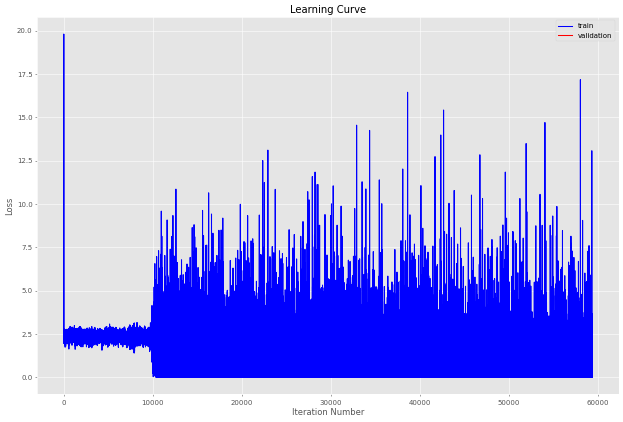

CPU times: user 1min 1s, sys: 212 ms, total: 1min 1s
Wall time: 1min 1s


In [147]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 1   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "Sigmoid-Sigmoid-Softmax, SimpleInit, SGD"

             # LayerClass,          {keywards}
layer_list = [(SimpleConv1dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_size":3, "padding":0,"stride":1, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr), "verbose":verbose}),
              (SigmoidLayer,        {"verbose":verbose}),
              (SimpleConv1dLayer,   {"n_ch_out":1, "n_ch_in":3, "filter_size":3, "padding":0,"stride":1, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr), "verbose":verbose}),
              (SigmoidLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":n_out2, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch1dCNNClassifier(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns

### 【問題8 解答】
Sprint10のディープニューラルネットワークでスクラッチ実装したモデルの内、1層目と2層目の全結合層をSimpleConv1d層に置き換え、活性化関数にはSigmoidを用いて学習・推定をさせたところ、Accuacyは0.9を超え、ある程度高い推定精度が得られた。

なお、ReLU関数を用いた場合でも推定してみたが、ReLUの場合は推定精度が非常に悪い結果となった（【その他】の失敗例を参照）。調査したところ、2回目のSimpleConv1d層での出力が全て負となり、その結果ReLU関数での出力が全て0になってしまっていた。
今回は畳み込み層用のInitializerの改造はSimpleInitializerのみしか行っていないが、HeInitializerも同様に改造を行い、ReLU関数の直前のSimpleConv1d層でHeInitializerによる初期化を行うことで、ReLUの場合も推定精度が改善できるかもしれない。（時間の都合上、改善作業は省略する）


## 【その他】

### ●その他の動作確認（失敗例）

#### ・エポック:1, 学習率:0.1, バッチサイズ:1, ReLU-ReLU-Softmax, SimpleInit, SGD

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[0 0 0 ... 0 0 0]
y_predict_proba:
[[0.11934273 0.1022012  0.09254914 ... 0.10615933 0.10404077 0.09256453]
 [0.11934273 0.1022012  0.09254914 ... 0.10615933 0.10404077 0.09256453]
 [0.11934273 0.1022012  0.09254914 ... 0.10615933 0.10404077 0.09256453]
 ...
 [0.11934273 0.1022012  0.09254914 ... 0.10615933 0.10404077 0.09256453]
 [0.11934273 0.1022012  0.09254914 ... 0.10615933 0.10404077 0.09256453]
 [0.11934273 0.1022012  0.09254914 ... 0.10615933 0.10404077 0.09256453]]


###Confusion matrix（混同行列）###


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9
0,64,0,0,0,0,0,0,0,0,0
1,76,0,0,0,0,0,0,0,0,0
2,52,0,0,0,0,0,0,0,0,0
3,61,0,0,0,0,0,0,0,0,0
4,59,0,0,0,0,0,0,0,0,0
5,52,0,0,0,0,0,0,0,0,0
6,63,0,0,0,0,0,0,0,0,0
7,64,0,0,0,0,0,0,0,0,0
8,54,0,0,0,0,0,0,0,0,0
9,55,0,0,0,0,0,0,0,0,0




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, ReLU-ReLU-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.01, ReLU-ReLU-Softmax, SimpleInit, SGD)"
Accuacy,0.106667,0.901667,0.106667
Precision,0.010667,0.905839,0.010667
Recall,0.100000,0.896077,0.100000
F1,0.019277,0.899114,0.019277


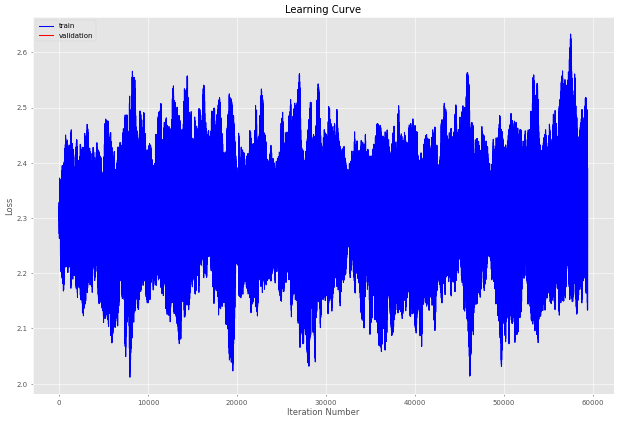

CPU times: user 52.3 s, sys: 266 ms, total: 52.6 s
Wall time: 52.6 s


In [ ]:
%%time
epoch = 1   # エポック
lr=0.01    # 学習率
batch_size = 1   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "ReLU-ReLU-Softmax, SimpleInit, SGD"

             # LayerClass,          {keywards}
layer_list = [(SimpleConv1dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_size":3, "padding":0,"stride":1, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (SimpleConv1dLayer,   {"n_ch_out":1, "n_ch_in":3, "filter_size":3, "padding":0,"stride":1, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":n_out2, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch1dCNNClassifier(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns

#### ・エポック:10, 学習率:0.1, バッチサイズ:1, ReLU-ReLU-Softmax, SimpleInit, SGD

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[0 0 0 ... 0 0 0]
y_predict_proba:
[[0.17175292 0.09398296 0.08762066 ... 0.10031556 0.09815841 0.08176116]
 [0.17175292 0.09398296 0.08762066 ... 0.10031556 0.09815841 0.08176116]
 [0.17175292 0.09398296 0.08762066 ... 0.10031556 0.09815841 0.08176116]
 ...
 [0.17175292 0.09398296 0.08762066 ... 0.10031556 0.09815841 0.08176116]
 [0.17175292 0.09398296 0.08762066 ... 0.10031556 0.09815841 0.08176116]
 [0.17175292 0.09398296 0.08762066 ... 0.10031556 0.09815841 0.08176116]]


###Confusion matrix（混同行列）###


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9
0,64,0,0,0,0,0,0,0,0,0
1,76,0,0,0,0,0,0,0,0,0
2,52,0,0,0,0,0,0,0,0,0
3,61,0,0,0,0,0,0,0,0,0
4,59,0,0,0,0,0,0,0,0,0
5,52,0,0,0,0,0,0,0,0,0
6,63,0,0,0,0,0,0,0,0,0
7,64,0,0,0,0,0,0,0,0,0
8,54,0,0,0,0,0,0,0,0,0
9,55,0,0,0,0,0,0,0,0,0




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:1, ReLU-ReLU-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, ReLU-ReLU-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:10, iter:59400, b_size:1, lr:0.1, ReLU-ReLU-Softmax, SimpleInit, SGD)"
Accuacy,0.106667,0.106667,0.106667
Precision,0.010667,0.010667,0.010667
Recall,0.100000,0.100000,0.100000
F1,0.019277,0.019277,0.019277


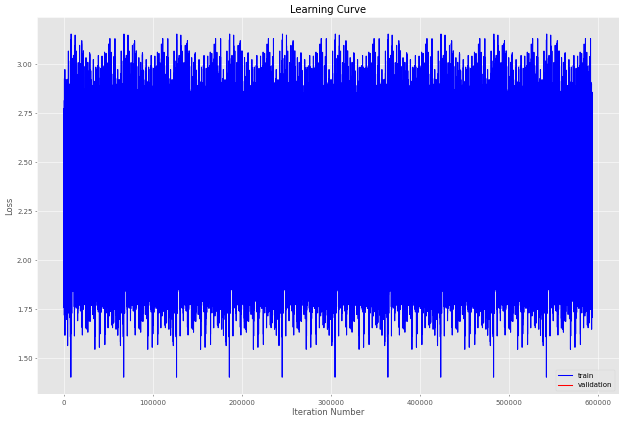

In [ ]:
# %%time
epoch = 10   # エポック
lr=0.1    # 学習率
batch_size = 1   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "ReLU-ReLU-Softmax, SimpleInit, SGD"

             # LayerClass,          {keywards}
layer_list = [(SimpleConv1dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_size":3, "padding":0,"stride":1, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (SimpleConv1dLayer,   {"n_ch_out":1, "n_ch_in":3, "filter_size":3, "padding":0,"stride":1, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr), "verbose":verbose}),              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":n_out2, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch1dCNNClassifier(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns

#### ・エポック:1, 学習率:0.001, バッチサイズ:1, ReLU-ReLU-Softmax, SimpleInit, SGD

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[1 1 1 ... 1 1 1]
y_predict_proba:
[[0.1002925  0.11021785 0.09834612 ... 0.10535748 0.09867899 0.09638923]
 [0.1002925  0.11021785 0.09834612 ... 0.10535748 0.09867899 0.09638923]
 [0.1002925  0.11021785 0.09834612 ... 0.10535748 0.09867899 0.09638923]
 ...
 [0.1002925  0.11021785 0.09834612 ... 0.10535748 0.09867899 0.09638923]
 [0.1002925  0.11021785 0.09834612 ... 0.10535748 0.09867899 0.09638923]
 [0.1002925  0.11021785 0.09834612 ... 0.10535748 0.09867899 0.09638923]]


###Confusion matrix（混同行列）###


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9
0,0,64,0,0,0,0,0,0,0,0
1,0,76,0,0,0,0,0,0,0,0
2,0,52,0,0,0,0,0,0,0,0
3,0,61,0,0,0,0,0,0,0,0
4,0,59,0,0,0,0,0,0,0,0
5,0,52,0,0,0,0,0,0,0,0
6,0,63,0,0,0,0,0,0,0,0
7,0,64,0,0,0,0,0,0,0,0
8,0,54,0,0,0,0,0,0,0,0
9,0,55,0,0,0,0,0,0,0,0




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:1, ReLU-ReLU-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, ReLU-ReLU-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:10, iter:59400, b_size:1, lr:0.1, ReLU-ReLU-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, ReLU-ReLU-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.001, ReLU-ReLU-Softmax, SimpleInit, SGD)"
Accuacy,0.106667,0.106667,0.106667,0.106667,0.126667
Precision,0.010667,0.010667,0.010667,0.010667,0.012667
Recall,0.100000,0.100000,0.100000,0.100000,0.100000
F1,0.019277,0.019277,0.019277,0.019277,0.022485


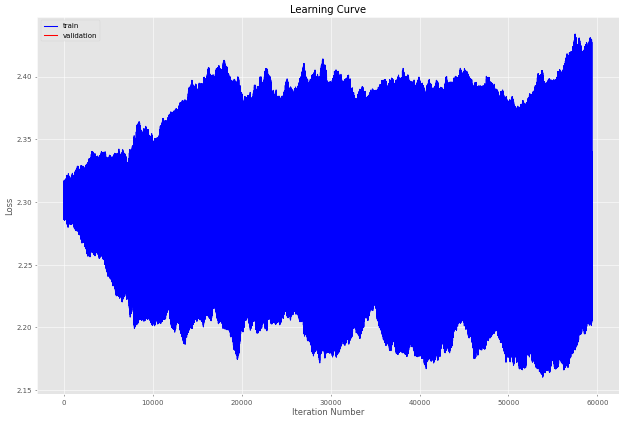

In [52]:
# %%time
epoch = 1   # エポック
lr=0.001    # 学習率
batch_size = 1   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "ReLU-ReLU-Softmax, SimpleInit, SGD"

             # LayerClass,          {keywards}
layer_list = [(SimpleConv1dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_size":3, "padding":0,"stride":1, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (SimpleConv1dLayer,   {"n_ch_out":1, "n_ch_in":3, "filter_size":3, "padding":0,"stride":1, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr), "verbose":verbose}),              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":n_out2, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch1dCNNClassifier(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns